





















# Loading Data:

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import Dataset
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kb1AyG21SfaLblUJGEB78b0LZnkrwDMBQ1KoGVbfBJNP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetection-donotdelete-pr-nomkpbwzlyopku'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds = pd.read_csv(body)
ds.head()
ds.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


# Familiarizing with Data

In [5]:
ds.shape

(1353, 10)

In [6]:
ds.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


# Visualizing the data

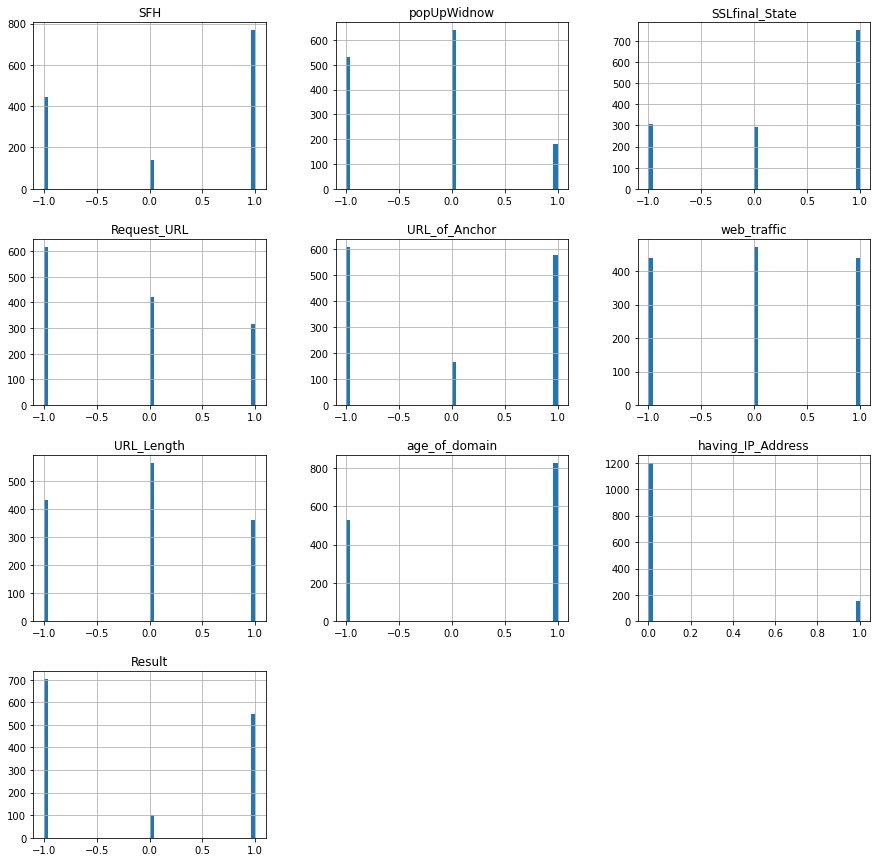

In [8]:
# Plotting the data distribution
ds.hist(bins=50,figsize=(15,15))
plt.show()

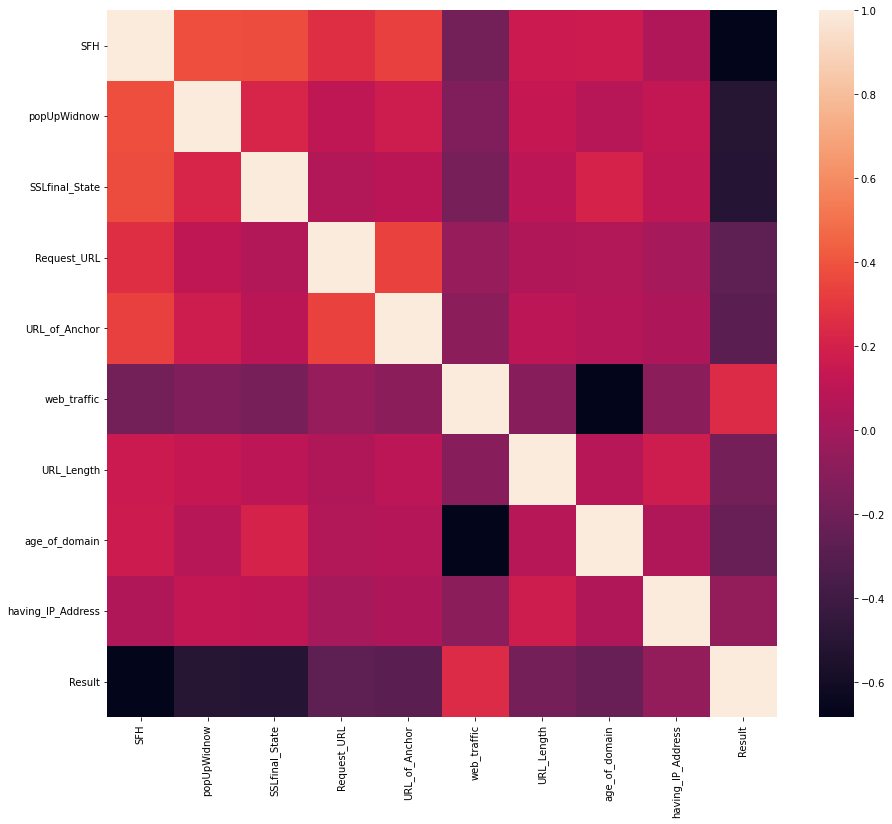

In [9]:
plt.figure(figsize=(15,13))
sns.heatmap(ds.corr())
plt.show()

# Data Preprocessing & EDA

In [10]:
ds.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data=ds.drop(['age_of_domain'],axis=1).copy()

In [12]:
data.isnull().sum()

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
having_IP_Address    0
Result               0
dtype: int64

In [13]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,having_IP_Address,Result
0,1,1,1,-1,1,0,0,0,-1
1,0,-1,1,0,1,-1,0,0,1
2,0,0,-1,0,1,0,-1,0,1
3,0,-1,1,-1,-1,0,-1,0,1
4,0,-1,-1,0,0,0,1,1,1


# Splitting the Data

In [14]:
y = data['Result']
X = data.drop('Result',axis=1)
X.shape, y.shape

((1353, 8), (1353,))

In [15]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((1082, 8), (271, 8))

# Machine Learning Models & Training

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
ML_Model = []
acc_train = []
acc_test = []

In [18]:
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Decision Tree Classifier

In [19]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [20]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [21]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.873
Decision Tree: Accuracy on test Data: 0.852


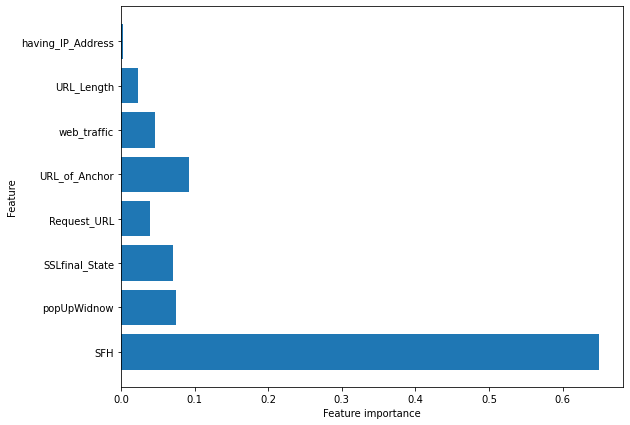

In [22]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [23]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Random Forest Classifier

In [24]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [25]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [26]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.871
Random forest: Accuracy on test Data: 0.867


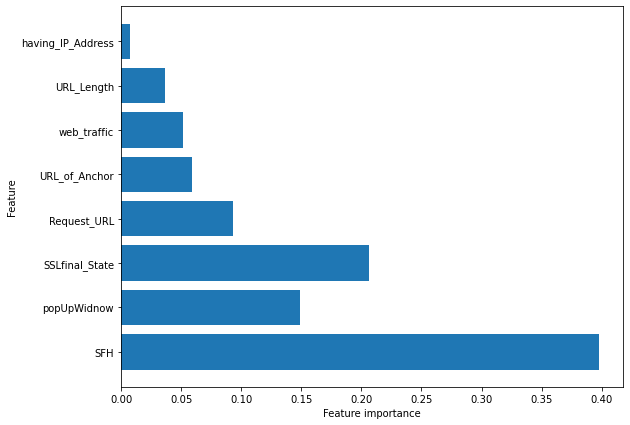

In [27]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [28]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [29]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [30]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [31]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.956
Multilayer Perceptrons: Accuracy on test Data: 0.893


In [32]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

# Comparision of Models

In [33]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.873,0.852
1,Random Forest,0.871,0.867
2,Multilayer Perceptrons,0.956,0.893


In [34]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.956,0.893
1,Random Forest,0.871,0.867
0,Decision Tree,0.873,0.852


In [35]:
import pickle
pickle.dump(tree, open('Phishing_website.pkl', 'wb'))

In [36]:
# load model from file
loaded_model = pickle.load(open('Phishing_website.pkl', 'rb'))
loaded_model

DecisionTreeClassifier(max_depth=5)

# Deployment

In [37]:
!pip install -U ibm-watson-machine-learning


In [38]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np


# Authentication and set space

In [39]:
wml_credentials= {
    "apikey":"tPYoi6dc_hrBJSa8H15zbwIZeBWGOqS5bb9MEvefIDiM",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [40]:
wml_clinet = APIClient(wml_credentials)

In [42]:
wml_clinet.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------  ------------------------
ID                                    NAME                CREATED
e7d17d6f-4202-4151-ada5-d68757105ea4  model               2022-11-05T06:45:13.308Z
cd12ac08-2117-4a17-bcc5-e6696a05bc2b  data-preprocessing  2022-11-04T04:28:38.242Z
9ecae5e9-fd0f-4988-ae13-550eef8a1993  dataset_website     2022-11-04T04:24:29.135Z
74be63aa-37fd-4158-9d78-964688bfe967  MODEL BUILDING      2022-11-04T04:06:13.140Z
------------------------------------  ------------------  ------------------------


In [44]:
SPACE_ID = "e7d17d6f-4202-4151-ada5-d68757105ea4"

In [45]:
wml_clinet.set.default_space(SPACE_ID)

'SUCCESS'

Autentication and space working is done

In [48]:
wml_clinet.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

# Save and deploy the model


In [49]:
import sklearn
sklearn.__version__

'1.0.2'

In [50]:
MODEL_NAME = "MODEL BUILDING"
DEPLOYMENT_NAME ="ML"
DEMO_MODEL = tree

In [51]:
#we need to set up python default version
#Set Python Version
software_spec_uid = wml_clinet.software_specifications.get_id_by_name('runtime-22.1-py3.9')

now creating model properties to deploy your model

In [52]:
#setup model meta

model_props = {
    wml_clinet.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_clinet.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_clinet.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [54]:
#save model

model_details = wml_clinet.repository.store_model(

    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [55]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Result',
  'schemas': {'input': [{'fields': [{'name': 'SFH', 'type': 'int64'},
      {'name': 'popUpWidnow', 'type': 'int64'},
      {'name': 'SSLfinal_State', 'type': 'int64'},
      {'name': 'Request_URL', 'type': 'int64'},
      {'name': 'URL_of_Anchor', 'type': 'int64'},
      {'name': 'web_traffic', 'type': 'int64'},
      {'name': 'URL_Length', 'type': 'int64'},
      {'name': 'having_IP_Address', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-05T06:53:44.886Z',
  'id': '73b58c81-8b37-41f0-8984-a87ddbc15f1d',
  'modified_at': '2022-11-05T06:53:48.442Z',
  'name': 'MODEL BUILDING',
  'owner': 'IBMid-665002L30O',
  'resource_key': '65f8a927-2a05-45c3-92e9-b786351799c4',
  'space_id': 'e7d17d6f-4202-4151-ada5-d68757105e

In [56]:
model_id = wml_clinet.repository.get_model_id(model_details)

check your model id if you got then it is created

In [57]:
model_id

'73b58c81-8b37-41f0-8984-a87ddbc15f1d'

In [58]:
#deploying props
#set meta

deployment_props= {
    wml_clinet.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_clinet.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [59]:
#Deploy
development = wml_clinet.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
) 



#######################################################################################

Synchronous deployment creation for uid: '73b58c81-8b37-41f0-8984-a87ddbc15f1d' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='948c1580-ae46-442d-9336-527744e09a09'
------------------------------------------------------------------------------------------------


